#  Decision Tree and Lasso Regression for AirBnB Data

## By Anoulom Phimphivong

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from sqlalchemy import create_engine
import numpy as np
import sklearn as sk
import datetime as dt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import cross_val_score
from numpy import arange
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import os


sns.set_style('whitegrid')

import warnings
warnings.filterwarnings('ignore')

pd.set_option("display.max_info_columns",200)


## Import Data

In [2]:
df_listings = pd.read_csv('data/listings.csv', index_col=None)
df_hosts = pd.read_csv('data/hosts.csv', index_col=None)
df_reviews = pd.read_csv('data/reviews.csv', index_col=None)
df_calendar = pd.read_csv('data/calendar.csv', index_col=None)

## View Data

In [3]:
df_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6144 entries, 0 to 6143
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            6144 non-null   int64  
 1   listing_url                                   6144 non-null   object 
 2   scrape_id                                     6144 non-null   int64  
 3   last_scraped                                  6144 non-null   object 
 4   name                                          6144 non-null   object 
 5   description                                   6079 non-null   object 
 6   neighborhood_overview                         4599 non-null   object 
 7   picture_url                                   6144 non-null   object 
 8   host_id                                       6144 non-null   int64  
 9   host_url                                      6144 non-null   o

In [4]:
df_listings.head()

id                          listing_url       scrape_id last_scraped  \
0    6422    https://www.airbnb.com/rooms/6422  20210219004252   2021-02-20   
1   25613   https://www.airbnb.com/rooms/25613  20210219004252   2021-02-20   
2  136015  https://www.airbnb.com/rooms/136015  20210219004252   2021-02-20   
3  258817  https://www.airbnb.com/rooms/258817  20210219004252   2021-02-20   
4  289242  https://www.airbnb.com/rooms/289242  20210219004252   2021-02-20   

                                             name  \
0                                 Nashville Charm   
1  Room in Historic East Nashville Craftsman Home   
2               Apart. on the Ridge near Opryland   
3         ButterflyRoom-private bath- open Jan 26   
4     MorningstarHouse, monthly room- open Feb  2   

                                         description  \
0  30 day or more rental during COVID. Show COVID...   
1  Serve up some sweet sounds on the piano and wi...   
2  Fantastic View! Overlooks farms and is on the ...   
3  Morningstar House! Extended stay - 3+ months- ...   
4  Morningstar House! Extended stay - price reduc...   

                               neighborhood_overview  \
0  Historic East Nashville is home to many new an...   
1  This home is in a walkable neighborhood with i...   
2              Dead end street with great neighbors!   
3  I'm  very near the Percy Priest Lake, natural ...   
4  The Morningstar House is in a quiet cul-de-sac...   

                                         picture_url  host_id  \
0  https://a0.muscache.com/pictures/pro_photo_too...    12172   
1  https://a0.muscache.com/pictures/60aa90fe-1b3f...    95811   
2  https://a0.muscache.com/pictures/2739438/005be...   666322   
3  https://a0.muscache.com/pictures/eef19bc4-2743...    22296   
4  https://a0.muscache.com/pictures/40a7ab72-20f7...    22296   

                                   host_url  ... review_scores_communication  \
0   https://www.airbnb.com/users/show/12172  ...                        10.0   
1   https://www.airbnb.com/users/show/95811  ...                        10.0   
2  https://www.airbnb.com/users/show/666322  ...                        10.0   
3   https://www.airbnb.com/users/show/22296  ...                        10.0   
4   https://www.airbnb.com/users/show/22296  ...                         9.0   

  review_scores_location review_scores_value license instant_bookable  \
0                   10.0                10.0     NaN                f   
1                   10.0                10.0     NaN                t   
2                   10.0                10.0     NaN                f   
3                    9.0                 9.0     NaN                f   
4                    9.0                 9.0     NaN                f   

  calculated_host_listings_count calculated_host_listings_count_entire_homes  \
0                              1                                           0   
1                              1                                           0   
2                              2                                           2   
3                              7                                           0   
4                              7                                           0   

  calculated_host_listings_count_private_rooms  \
0                                            1   
1                                            1   
2                                            0   
3                                            6   
4                                            6   

  calculated_host_listings_count_shared_rooms reviews_per_month  
0                                           0              4.69  
1                                           0              3.87  
2                                           0              0.43  
3                                           1              0.86  
4                                           1              0.68  

[5 rows x 74 columns]

In [96]:
df_listings['host_is_superhost']

0       1
1       1
2       0
3       1
4       1
       ..
6139    0
6140    0
6141    0
6142    0
6143    0
Name: host_is_superhost, Length: 6059, dtype: int32

In [5]:
df_listings['amenities'].head()

0    ["Hair dryer", "Bathtub", "Lock on bedroom doo...
1    ["Hair dryer", "Carbon monoxide alarm", "Air c...
2    ["Fire extinguisher", "Wifi", "Dryer", "Washer...
3    ["Hair dryer", "Air conditioning", "Smoke alar...
4    ["Hair dryer", "Air conditioning", "Smoke alar...
Name: amenities, dtype: object

In [6]:
df_ad = pd.read_csv('data/amenitiesdummies_top87.csv', index_col=None, header=0)

In [7]:
df_ad

Index  Wifi  Smokealarm  Heating  Airconditioning  TV  Essentials  \
0         0     1           1        1                1   1           1   
1         1     1           1        1                1   1           0   
2         2     1           1        1                1   1           1   
3         3     1           1        1                1   1           1   
4         4     1           1        1                1   1           1   
...     ...   ...         ...      ...              ...  ..         ...   
6139   6139     1           1        0                0   1           1   
6140   6140     1           1        1                0   1           1   
6141   6141     1           1        1                1   1           0   
6142   6142     1           1        0                0   1           1   
6143   6143     1           1        1                1   1           1   

      Hairdryer  Iron  Hangers  ...  Pocketwifi  Buildingstaff  Outletcovers  \
0             1     1        1  ...           0              0             0   
1             1     1        0  ...           0              0             0   
2             0     0        0  ...           0              0             0   
3             1     1        1  ...           0              0             0   
4             1     1        1  ...           0              0             0   
...         ...   ...      ...  ...         ...            ...           ...   
6139          1     1        1  ...           0              0             0   
6140          1     1        1  ...           1              0             0   
6141          0     0        1  ...           0              0             0   
6142          1     1        1  ...           0              0             0   
6143          1     1        1  ...           0              0             0   

      Portablefans  Crib  Laundromatnearby  Hostgreetsyou  Babysafetygates  \
0                1     0                 0              1                0   
1                0     0                 0              0                0   
2                0     0                 0              0                0   
3                0     0                 0              0                0   
4                0     0                 0              0                0   
...            ...   ...               ...            ...              ...   
6139             0     0                 0              0                0   
6140             0     0                 0              0                0   
6141             0     0                 0              0                0   
6142             0     0                 0              0                0   
6143             0     0                 0              0                0   

      Gameconsole  Outdoordiningarea  
0               0                  0  
1               0                  0  
2               0                  0  
3               0                  0  
4               0                  0  
...           ...                ...  
6139            0                  0  
6140            0                  0  
6141            0                  0  
6142            0                  0  
6143            0                  0  

[6144 rows x 88 columns]

In [8]:
df_hosts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2917 entries, 0 to 2916
Data columns (total 38 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 2917 non-null   int64  
 1   host_name                  2915 non-null   object 
 2   host_since                 2917 non-null   float64
 3   host_response_rate         2181 non-null   object 
 4   host_acceptance_rate       2478 non-null   object 
 5   host_is_superhost          2917 non-null   int64  
 6   host_neighbourhood         711 non-null    object 
 7   host_listings_count        2917 non-null   float64
 8   host_total_listings_count  2917 non-null   float64
 9   host_has_profile_pic       2917 non-null   int64  
 10  host_identity_verified     2917 non-null   int64  
 11  hv_None                    2917 non-null   int64  
 12  hv_email                   2917 non-null   int64  
 13  hv_facebook                2917 non-null   int64

In [9]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262469 entries, 0 to 262468
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   listing_id     262469 non-null  int64 
 1   id             262469 non-null  int64 
 2   date           262469 non-null  object
 3   reviewer_id    262469 non-null  int64 
 4   reviewer_name  262469 non-null  object
 5   comments       262339 non-null  object
dtypes: int64(3), object(3)
memory usage: 12.0+ MB


In [10]:
df_calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2242782 entries, 0 to 2242781
Data columns (total 7 columns):
 #   Column          Dtype  
---  ------          -----  
 0   listing_id      int64  
 1   date            object 
 2   available       object 
 3   price           object 
 4   adjusted_price  object 
 5   minimum_nights  float64
 6   maximum_nights  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 119.8+ MB


In [11]:
#df_cal_listings = pd.read_csv('data/cal_listings.csv', index_col=None, header=0)

In [12]:
# df_cal_listings.info(1)

## Data Cleaning and Preprocessing

In [13]:
df_listings = df_listings.drop(columns=['neighbourhood_group_cleansed', 'bathrooms', 'calendar_updated', 'license'])

In [14]:
df_listings.isnull().sum()[df_listings.isnull().sum() > 0]

description                      65
neighborhood_overview          1545
host_name                         6
host_since                        6
host_location                    13
host_about                     1978
host_response_time              931
host_response_rate              931
host_acceptance_rate            515
host_is_superhost                 6
host_thumbnail_url                6
host_picture_url                  6
host_neighbourhood             3138
host_listings_count               6
host_total_listings_count         6
host_verifications                6
host_has_profile_pic              6
host_identity_verified            6
neighbourhood                  1545
bathrooms_text                    4
bedrooms                        369
beds                             17
first_review                    939
last_review                     939
review_scores_rating            955
review_scores_accuracy         1020
review_scores_cleanliness      1019
review_scores_checkin       

In [15]:
df_listings['host_since'] = pd.to_datetime(df_listings['host_since'])

In [16]:
from sklearn.preprocessing import LabelEncoder 
lc = LabelEncoder()

In [17]:
df_listings['host_is_superhost'].value_counts(dropna=False)

host_is_superhost
t      3515
f      2623
NaN       6
Name: count, dtype: int64

In [18]:
df_listings = df_listings.loc[df_listings['host_is_superhost'].notna()]

In [19]:
df_listings['host_is_superhost']=lc.fit_transform(df_listings['host_is_superhost'])
# value_count
df_listings['host_is_superhost'].value_counts(dropna=True)
#0 is No and 1 is Yes

host_is_superhost
1    3515
0    2623
Name: count, dtype: int64

In [20]:
df_listings['host_has_profile_pic'].value_counts(dropna=False)

host_has_profile_pic
t    6133
f       5
Name: count, dtype: int64

In [21]:
df_listings['host_has_profile_pic']=lc.fit_transform(df_listings['host_has_profile_pic'])
# value_count
df_listings['host_has_profile_pic'].value_counts(dropna=True)
#0 is No and 1 is Yes

host_has_profile_pic
1    6133
0       5
Name: count, dtype: int64

In [22]:
df_listings['host_identity_verified'].value_counts(dropna=False)

host_identity_verified
t    5056
f    1082
Name: count, dtype: int64

In [23]:
df_listings['host_identity_verified']=lc.fit_transform(df_listings['host_identity_verified'])
# value_count
df_listings['host_identity_verified'].value_counts(dropna=True)
#0 is No and 1 is Yes

host_identity_verified
1    5056
0    1082
Name: count, dtype: int64

In [24]:
df_listings['neighbourhood_cleansed'] = df_listings['neighbourhood_cleansed'].str.replace('District', '').str.strip().astype(int)


In [25]:
dummies_rt=pd.get_dummies(df_listings['room_type'],drop_first=False,dtype='int')
df_listings=pd.concat([df_listings, dummies_rt],axis=1)

In [26]:
df_listings['amenities_count'] = df_listings['amenities'].apply(lambda x: len(x))

In [27]:
df_listings['amenities_count'].value_counts()

amenities_count
450     70
476     60
530     50
422     42
487     40
        ..
764      1
91       1
171      1
1096     1
890      1
Name: count, Length: 816, dtype: int64

df_listings['price'] = df_listings['price'].str.replace('$', '').str.replace(',', '').astype(float)
end_visuals['price'] = end_visuals['price'].str.replace('$', '').str.replace(',', '').astype(float)
end_visuals_mp['price'] = end_visuals_mp['price'].str.replace('$', '').str.replace(',', '').astype(float)


In [29]:
df_listings['instant_bookable'].value_counts(dropna=False)

instant_bookable
t    3519
f    2619
Name: count, dtype: int64

In [30]:
df_listings['instant_bookable']=lc.fit_transform(df_listings['instant_bookable'])
# value_count
df_listings['instant_bookable'].value_counts(dropna=True)
#0 is No and 1 is Yes

instant_bookable
1    3519
0    2619
Name: count, dtype: int64

In [31]:
df_listings = df_listings.fillna(0)

## Removing Outliers

In [32]:
top50=df_listings.nlargest(50, 'price')

In [33]:
top50['price']

3373    25000.0
3374    25000.0
3375    25000.0
3376    25000.0
3377    25000.0
3378    25000.0
4048    25000.0
3412    10000.0
3413    10000.0
4211     9999.0
3333     4800.0
1770     4680.0
5244     4513.0
4405     4452.0
1291     3897.0
3646     3657.0
3979     3535.0
2615     3500.0
3858     3019.0
4031     2801.0
196      2750.0
2143     2500.0
6075     2500.0
3329     2400.0
4507     2385.0
5896     2203.0
2918     2142.0
1426     2029.0
2698     2029.0
1517     2000.0
4519     2000.0
5434     2000.0
5603     2000.0
377      1888.0
1428     1800.0
3229     1800.0
4252     1800.0
4779     1758.0
4530     1658.0
502      1657.0
3330     1600.0
3331     1600.0
3332     1600.0
6137     1599.0
6138     1599.0
6067     1596.0
5566     1575.0
2212     1500.0
2298     1500.0
2891     1500.0
Name: price, dtype: float64

In [34]:
#Original code experimenting with different price thresholds

#df_listings = df_listings[df_listings['price'] <= 5000

#df_listings = df_listings[df_listings['price'] <= 2000]

In [35]:
#Outliers above 2000

df_listings = df_listings[df_listings['price'] <= 1000]

In [36]:
top50=df_listings.nlargest(50, 'price')

In [37]:
top50['price'].reset_index()

index   price
0    2817  1000.0
1    3038  1000.0
2    4038  1000.0
3    4364  1000.0
4    5308  1000.0
5    5944  1000.0
6    2238   999.0
7    3323   999.0
8    6026   999.0
9    5772   994.0
10   1807   971.0
11   2110   957.0
12   4352   950.0
13   1572   949.0
14   4832   942.0
15   3103   929.0
16   1342   919.0
17   4429   911.0
18   1441   907.0
19   5574   907.0
20   5575   907.0
21    921   900.0
22   3150   900.0
23   4247   900.0
24   4249   900.0
25   2692   899.0
26   2861   893.0
27   2862   893.0
28    657   880.0
29   4671   880.0
30   4672   876.0
31   4378   873.0
32   4476   873.0
33   4865   870.0
34    753   850.0
35   6066   849.0
36   6068   849.0
37   1106   842.0
38   1556   833.0
39   3188   828.0
40   3426   828.0
41   3941   818.0
42   2361   817.0
43   4037   813.0
44   2586   803.0
45   2890   802.0
46   1255   800.0
47   3594   800.0
48   3969   800.0
49   5841   800.0

## EDA and Visualizations

In [38]:
end_visuals = df_listings[['review_scores_value','host_total_listings_count','calculated_host_listings_count_entire_homes',
                          'reviews_per_month','amenities_count','instant_bookable','price',
                          'calculated_host_listings_count','maximum_nights_avg_ntm',
                          'calculated_host_listings_count_private_rooms','availability_365','number_of_reviews_ltm',
                          'calculated_host_listings_count_shared_rooms','beds','host_is_superhost']]

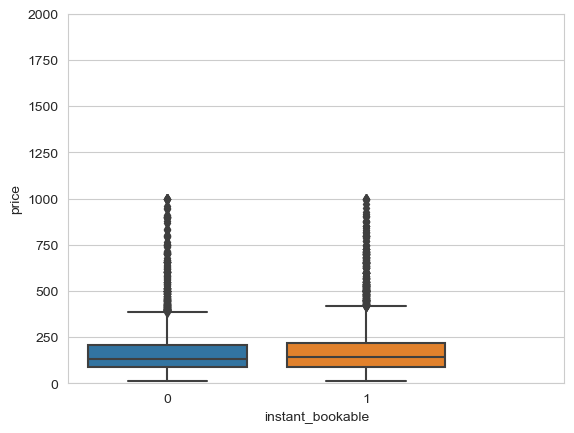

In [39]:
ax= sns.boxplot(x="instant_bookable", y="price", data=end_visuals)
ax.set_xlim(-0.5, 2)  
ax.set_ylim(0, 2000)
plt.show()

Text(0.5, 1.0, 'Number of Amenities against Price')

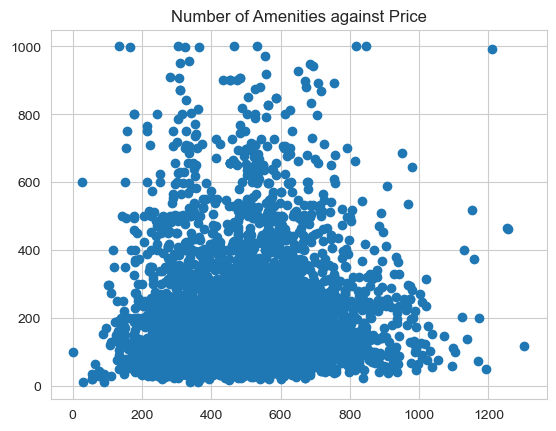

In [40]:
plt.scatter(x=end_visuals['amenities_count'],y=end_visuals['price'])
plt.title("Number of Amenities against Price")

<Axes: xlabel='host_is_superhost', ylabel='review_scores_value'>

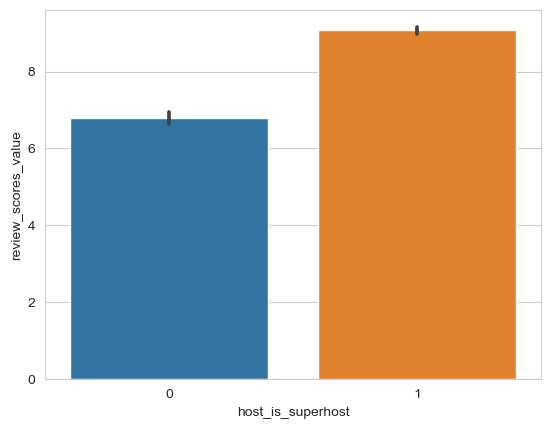

In [41]:
sns.barplot(x="host_is_superhost", y="review_scores_value", data=end_visuals)

nashville = gpd.read_file('data/TN_City_Boundaries.shp')

nashville = gpd.GeoDataFrame(nashville)
nashville = nashville.to_crs(epsg=3857)
nashville = nashville.to_crs(epsg=4326)

end_visuals_mp = gpd.GeoDataFrame(end_visuals, 
                                geometry=gpd.points_from_xy(end_visuals.longitude, end_visuals.latitude), crs="EPSG:4326")

ax = end_visuals_mp.plot(column='price',zorder=2,markersize=5)
nashville.plot(ax=ax,zorder=1,color='g').set_title("Nashville Airbnb Price Distribution")

## Lasso Regression for Price

### Create the X and y datasets

In [42]:
#create the X and y datasets
X = df_listings.drop(['id','host_since','price','name','latitude','longitude','amenities','room_type','property_type',
                      'host_verifications','neighbourhood','listing_url','description','neighborhood_overview','host_location',
                      'host_about','host_neighbourhood','host_url','host_id','host_name','host_response_time','host_response_rate',
                      'host_acceptance_rate','host_thumbnail_url','bathrooms_text', 'host_picture_url','host_listings_count', 'picture_url', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'scrape_id', 'minimum_nights', 'maximum_nights', 'has_availability', 'availability_30', 'calendar_last_scraped', 'last_scraped', 'first_review', 'last_review', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location'],axis=1)

y = df_listings['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [43]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6059 entries, 0 to 6143
Data columns (total 28 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   host_is_superhost                             6059 non-null   int32  
 1   host_total_listings_count                     6059 non-null   float64
 2   host_has_profile_pic                          6059 non-null   int32  
 3   host_identity_verified                        6059 non-null   int32  
 4   neighbourhood_cleansed                        6059 non-null   int32  
 5   accommodates                                  6059 non-null   int64  
 6   bedrooms                                      6059 non-null   float64
 7   beds                                          6059 non-null   float64
 8   minimum_nights_avg_ntm                        6059 non-null   float64
 9   maximum_nights_avg_ntm                        6059 non-null   float6

0.4742362250453288
0.4306134395938632


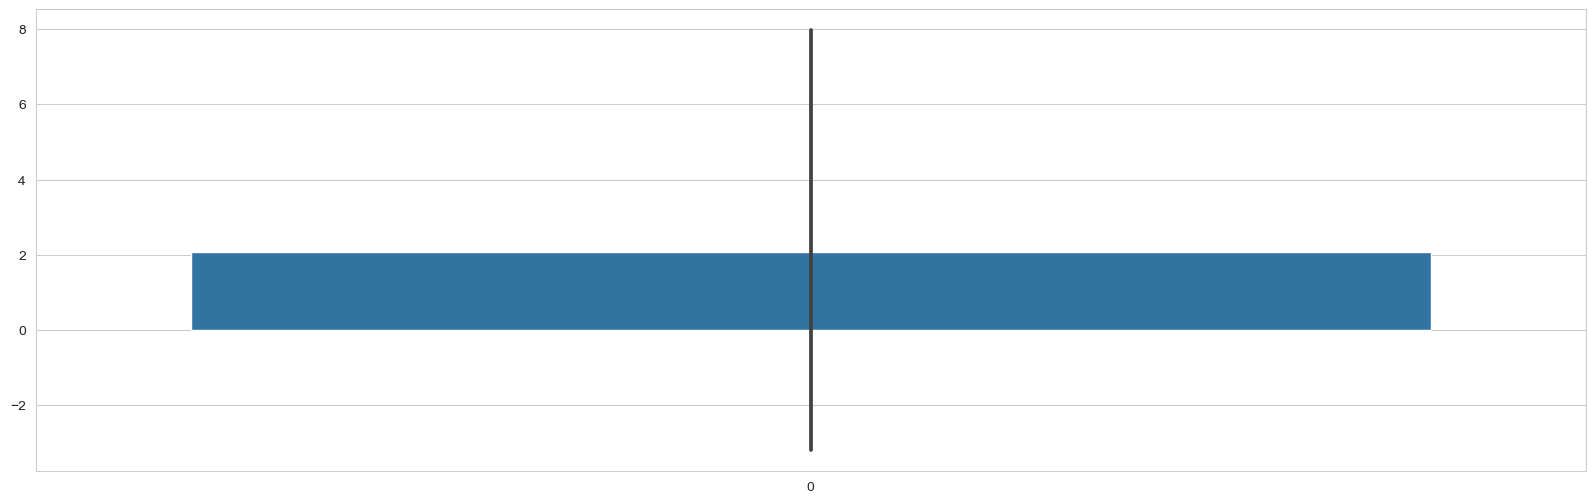

array([  3.95618781,   1.26859519,  -1.50799648,  -2.2950837 ,
        10.03663642,  43.22814252,  41.73758666,  11.57332976,
         1.50970026,   1.11049092,  30.87314305, -34.3049928 ,
         5.1897961 ,   3.78789421,  -7.59350166,  -6.03660538,
        -9.6548577 ,   3.76247024,  -0.        , -19.81788445,
         2.2021492 ,  -2.43910625, -13.65396231,   0.        ,
        10.24546427,  -9.35509343,  -0.07237338,  -5.67824792])

In [44]:
lasso = Lasso(alpha=0.02, fit_intercept=True, max_iter=3000)

pipe = Pipeline([('scaler',StandardScaler()),
                 ('lasso',lasso)
                ])

pipe.fit(X_train, y_train)

print(pipe.score(X_train, y_train))
print(pipe.score(X_test, y_test))

lasso_coef = pipe.named_steps['lasso'].coef_

plt.figure(figsize=(20,6))
sns.barplot(lasso_coef)
plt.show()

pipe.named_steps['lasso'].coef_

In [45]:
alphas = np.linspace(0.0001,0.005,20)
alphas

array([0.0001    , 0.00035789, 0.00061579, 0.00087368, 0.00113158,
       0.00138947, 0.00164737, 0.00190526, 0.00216316, 0.00242105,
       0.00267895, 0.00293684, 0.00319474, 0.00345263, 0.00371053,
       0.00396842, 0.00422632, 0.00448421, 0.00474211, 0.005     ])

In [46]:
count = []
score_train = []
score_test = []

for a in alphas:
    lasso2 = Lasso(alpha=a, fit_intercept=True, max_iter=3000)
    
    pipe2 = Pipeline([('scaler',StandardScaler()),
                     ('lasso',lasso2)
                    ])
    
    pipe2.fit(X_train, y_train)
    
    lasso_coef = pipe2.named_steps['lasso'].coef_
    
    lasso_coef = lasso_coef[ lasso_coef != 0 ]
    
    count.append( len(lasso_coef) )
    score_train.append(pipe2.score(X_train, y_train))
    score_test.append(pipe2.score(X_test, y_test))
# end

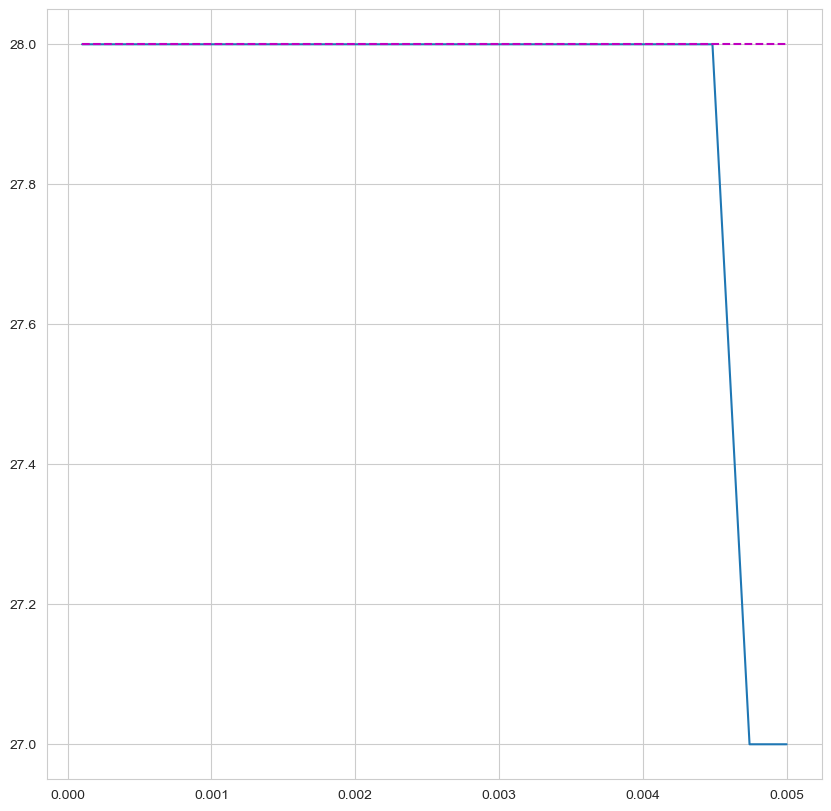

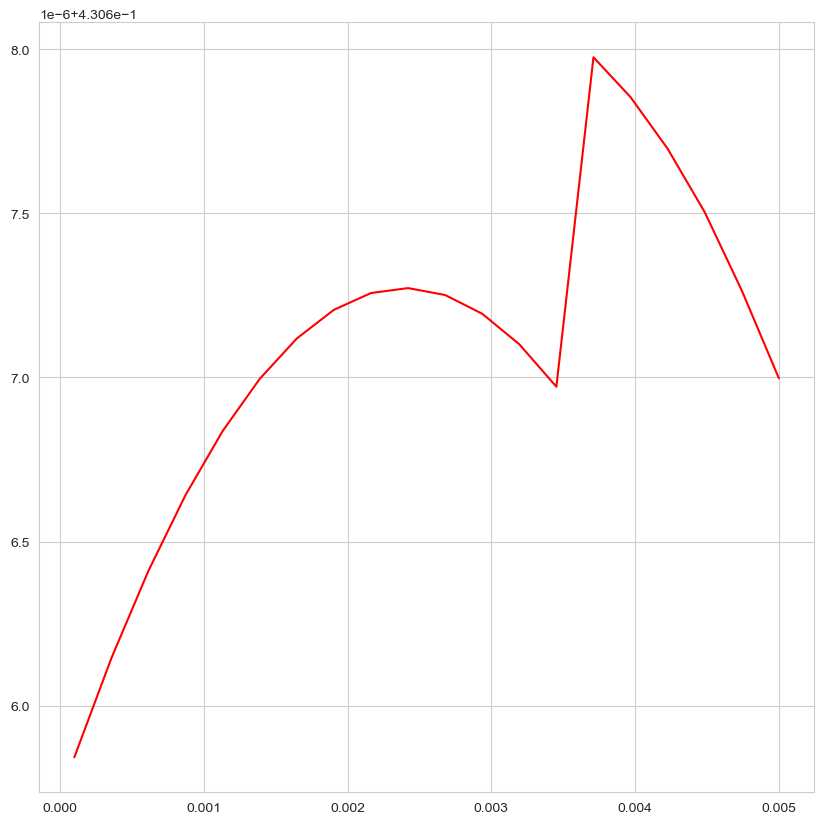

In [47]:
plt.figure(figsize=(10,10))
plt.plot(alphas, count)
plt.plot(alphas, np.ones(len(alphas))*X.shape[1], 'm--')

plt.figure(figsize=(10,10))
#plt.plot(alphas, score_train, 'g')
plt.plot(alphas, score_test, 'r')

### Finding the appropriate technique and optimal alpha

In [48]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import cross_val_score
from numpy import arange
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold

iteration 0.001 done
iteration 0.005 done
iteration 0.01 done
iteration 0.05 done
iteration 0.1 done
iteration 0.25 done
iteration 0.5 done
iteration 1 done


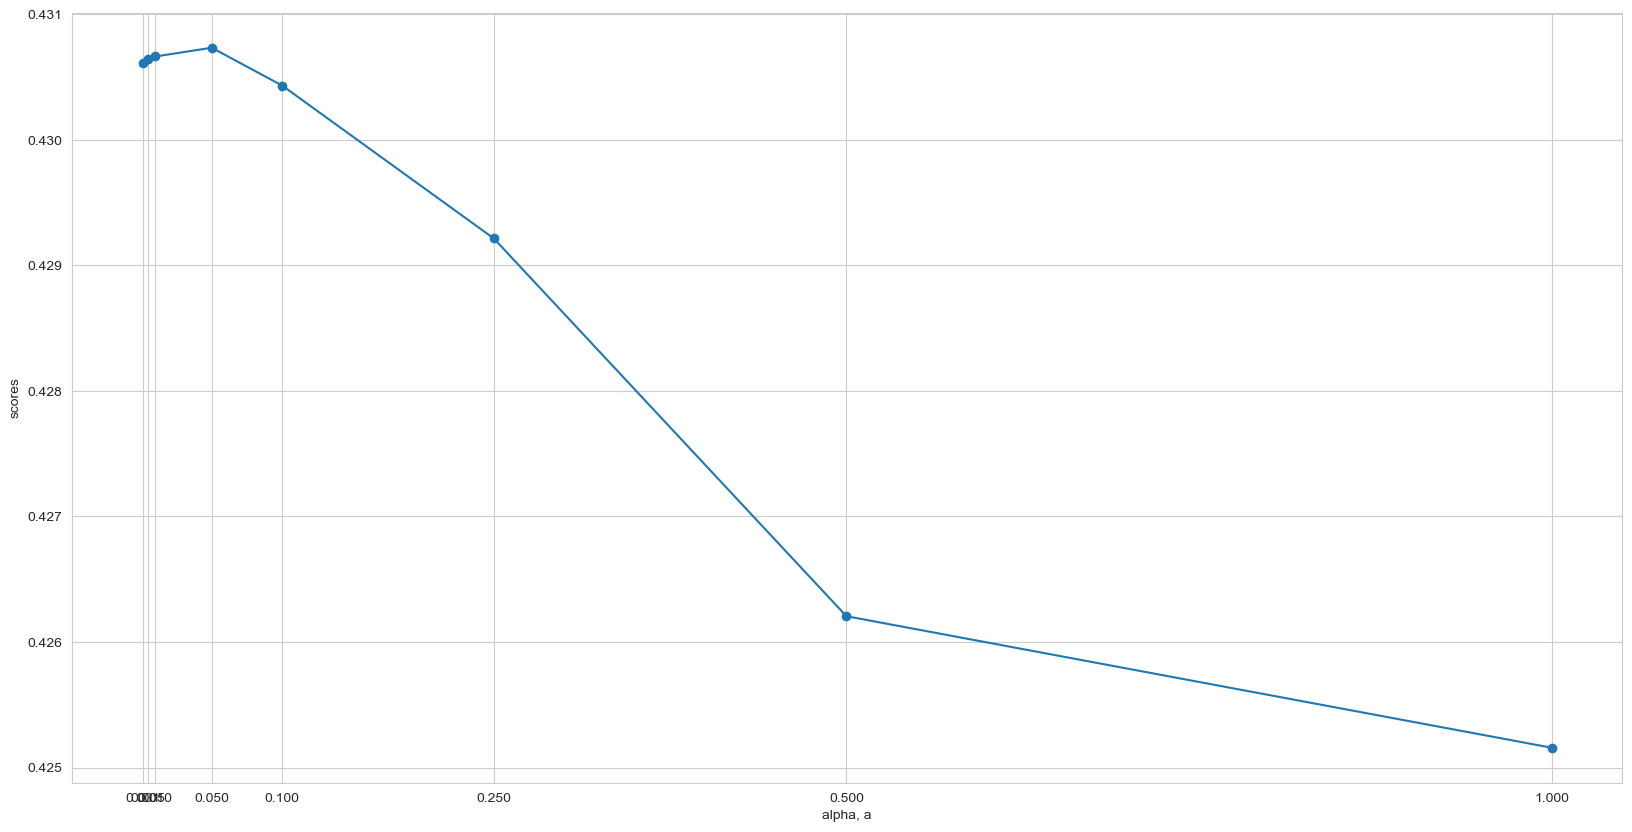

In [49]:
plt.figure(figsize=(20,10))

alphas = [0.001, 0.005, 0.01, 0.05, 0.1, 0.25, 0.5, 1]
#alphas = [0.1, 0.5, 1, 5, 10, 25, 50, 100]
scores = []

for a in alphas:
    lasso = Lasso(alpha = a, fit_intercept=True, max_iter=3000)
    lasso.fit(X_train, y_train)
    scores.append(lasso.score(X_test, y_test))
    print("iteration {} done".format(a))

plt.plot(alphas, scores, '-o')
plt.xlabel('alpha, a')
plt.ylabel('scores')
plt.xticks(alphas)
plt.show()

In [50]:
lascores001 = cross_val_score(Lasso( fit_intercept=True, max_iter=3000,
alpha=0.001), X, y, cv=5, scoring = 'r2')
lascores01 = cross_val_score(Lasso( fit_intercept=True, max_iter=3000, 
alpha=0.01), X, y, cv=5, scoring = 'r2')
lascores05 = cross_val_score(Lasso(fit_intercept=True, max_iter=3000, 
alpha=0.05), X, y, cv=5, scoring = 'r2')
lascores10 = cross_val_score(Lasso(fit_intercept=True, max_iter=3000, 
alpha=0.10), X, y, cv=5, scoring = 'r2')
lascores25 = cross_val_score(Lasso(fit_intercept=True, max_iter=3000, 
alpha=0.25), X, y, cv=5, scoring = 'r2')
lascores50 = cross_val_score(Lasso(fit_intercept=True, max_iter=3000, 
alpha=0.50), X, y, cv=5, scoring = 'r2')
# Put r-squared values into a dataframe with headers
scores_list = {'lambda=.001': lascores001,'lambda=.01': lascores01,'lambda=.05': lascores05, 'lambda=.10': lascores10,
               'lambda=.25': lascores25, 'lambda=.50': lascores50}
df_lassoscores = pd.DataFrame(scores_list)
# Show results of 10 runs for each lambda (alpha) level
print('Lasso Regression Results')
df_lassoscores

Lasso Regression Results


lambda=.001  lambda=.01  lambda=.05  lambda=.10  lambda=.25  lambda=.50
0     0.446322    0.446588    0.447491    0.448294    0.450145    0.451043
1     0.473835    0.474093    0.474677    0.475055    0.476008    0.477136
2     0.397695    0.396636    0.390471    0.389666    0.387687    0.383639
3     0.374143    0.374073    0.373594    0.372840    0.370407    0.365973
4    -0.253591   -0.253646   -0.253670   -0.253861   -0.254544   -0.260125

In [51]:
df_lassoscores_chart = df_lassoscores.reset_index()
lasso_columns = df_lassoscores.columns
df_lassoscores_melt =pd.melt(df_lassoscores_chart, id_vars=['index'], \
    value_vars=lasso_columns)
df_lassoscores_melt.head()

index     variable     value
0      0  lambda=.001  0.446322
1      1  lambda=.001  0.473835
2      2  lambda=.001  0.397695
3      3  lambda=.001  0.374143
4      4  lambda=.001 -0.253591

<Axes: xlabel='index', ylabel='value'>

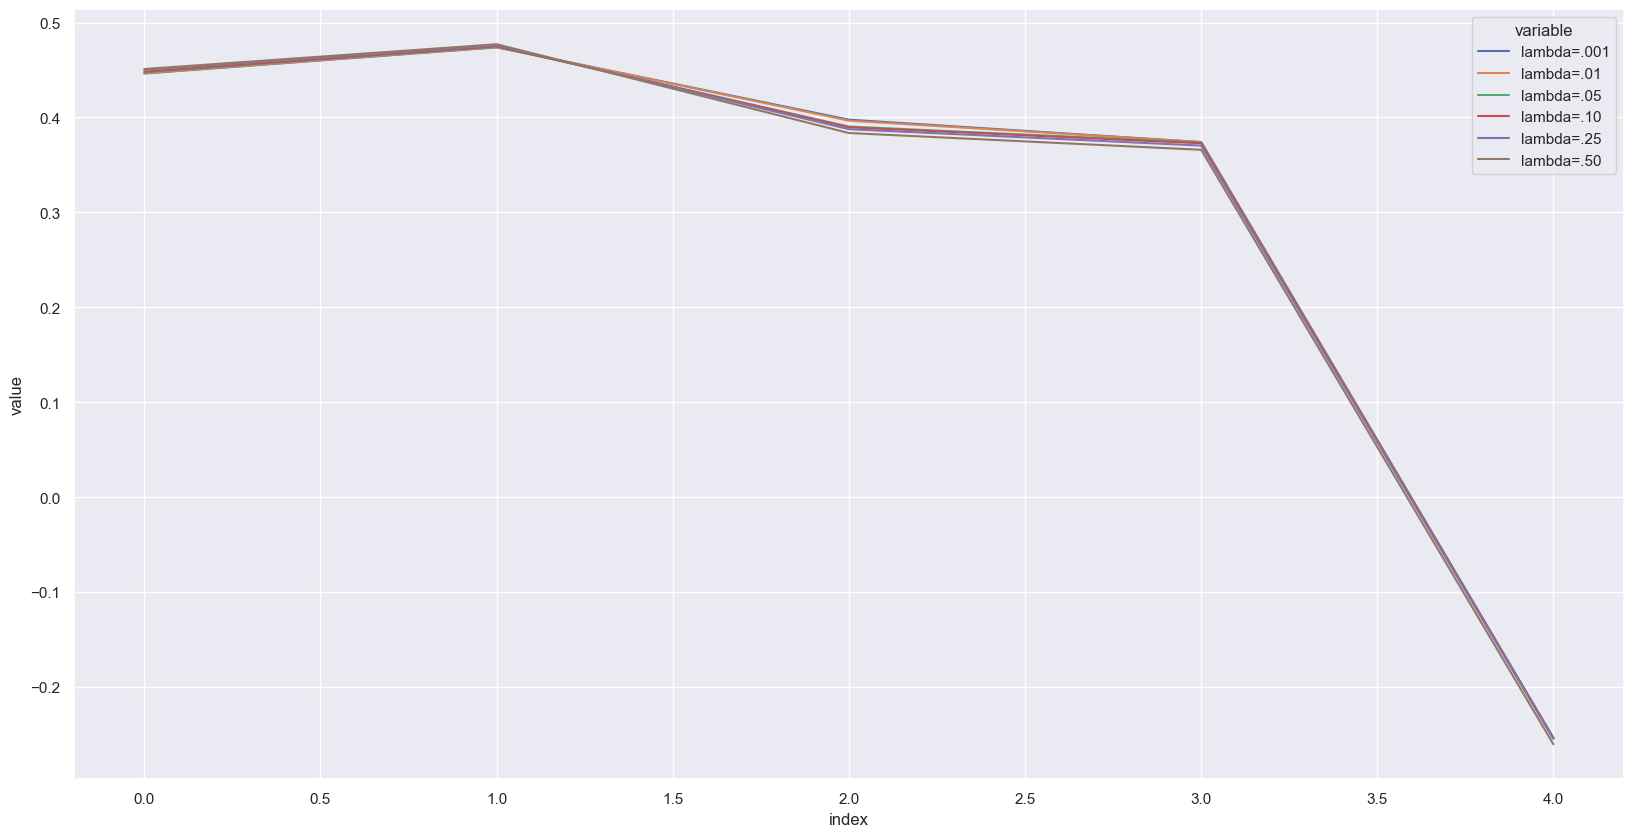

In [52]:
plt.figure(figsize=(20,10))
sns.set(style='darkgrid', palette='deep',)
sns.lineplot(x = 'index', y = 'value', hue = 'variable', data=df_lassoscores_melt)

(-1.84, 0.05)

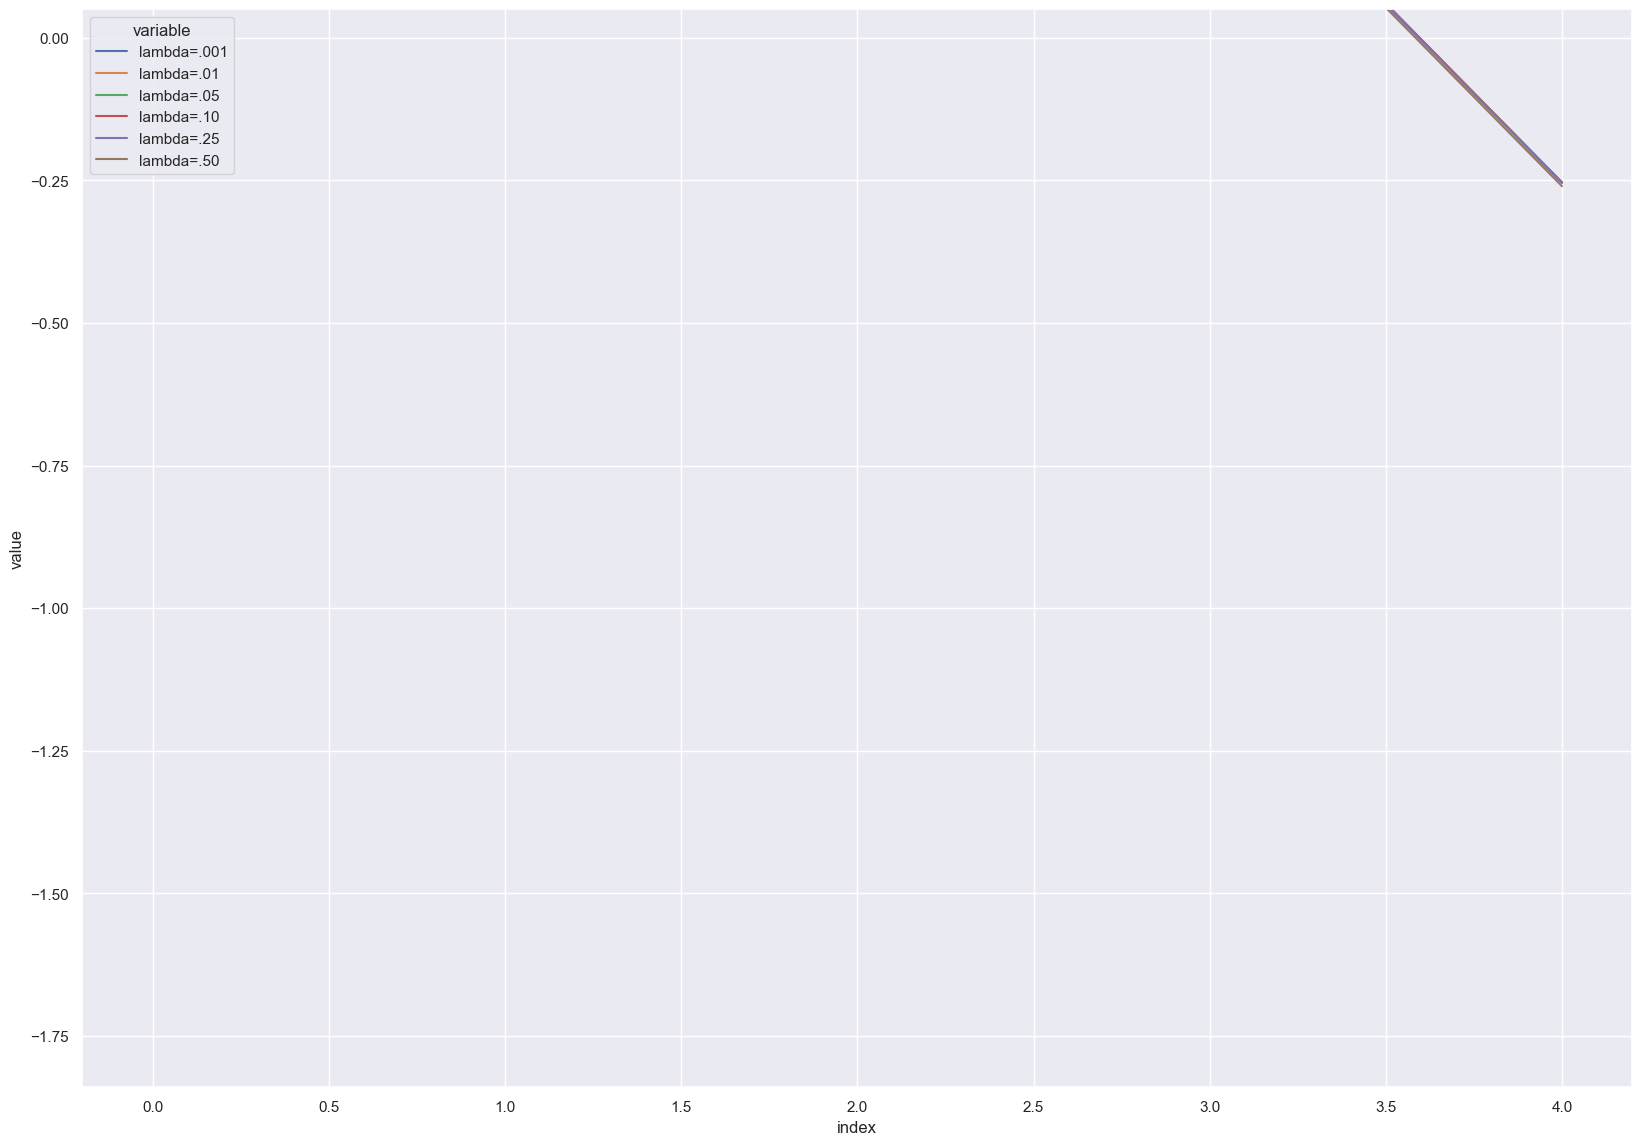

In [53]:
plt.figure(figsize=(20,14))
sns.set(style='darkgrid', palette='deep',)
chart = sns.lineplot(x = 'index', y = 'value', hue = 'variable', data=df_lassoscores_melt)
chart.set_ylim(-1.84, 0.05)

In [54]:
df_lasso_barplot = df_lassoscores.describe().T
df_lasso_barplot = df_lasso_barplot.reset_index()
df_lasso_barplot

index  count      mean       std       min       25%       50%  \
0  lambda=.001    5.0  0.287681  0.305113 -0.253591  0.374143  0.397695   
1   lambda=.01    5.0  0.287549  0.305111 -0.253646  0.374073  0.396636   
2   lambda=.05    5.0  0.286512  0.304757 -0.253670  0.373594  0.390471   
3   lambda=.10    5.0  0.286399  0.304885 -0.253861  0.372840  0.389666   
4   lambda=.25    5.0  0.285941  0.305245 -0.254544  0.370407  0.387687   
5   lambda=.50    5.0  0.283533  0.307377 -0.260125  0.365973  0.383639   

        75%       max  
0  0.446322  0.473835  
1  0.446588  0.474093  
2  0.447491  0.474677  
3  0.448294  0.475055  
4  0.450145  0.476008  
5  0.451043  0.477136

(-0.68, -0.65)

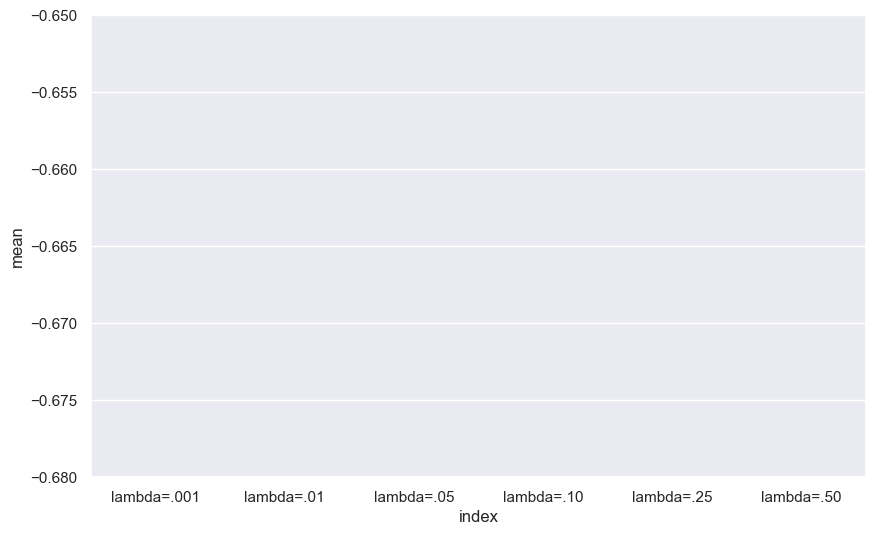

In [55]:
plt.figure(figsize=(10,6))
sns.set(style='darkgrid', palette='deep',)
chart = sns.barplot( y = "mean", x = "index", data = df_lasso_barplot)
chart.set_ylim([-0.68, -0.65])

In [56]:
reg_model = Lasso(fit_intercept=True, max_iter=3000)

crossval = RepeatedKFold(n_splits=5, n_repeats=4, random_state=42)

search_grid = dict()
# Set range and increments within range
search_grid['alpha'] = arange( .001, .01, 0.05)
# Define and perform the search
search = GridSearchCV(reg_model, search_grid, scoring='r2', cv=crossval, n_jobs=-1)
search_results = search.fit(X, y)
# Show "optimal" hyperparameter setting and performance measure
print('Best Lasso Regression Hyperparameter Setting from Grid Search')
print('Lasso Config: %s' % search_results.best_params_)
print('Best Value for Scoring Method: %.5f' % search_results.best_score_)

Best Lasso Regression Hyperparameter Setting from Grid Search
Lasso Config: {'alpha': 0.001}
Best Value for Scoring Method: 0.45588


### Parameter tuning to find the most significant features

In [57]:
lasso = Lasso(alpha=0.001, fit_intercept=True, max_iter=3000)

In [58]:
lasso.fit(X_train, y_train)

Lasso(alpha=0.001, max_iter=3000)

In [59]:
Lasso(alpha=0.001, max_iter=3000)

Lasso(alpha=0.001, max_iter=3000)

In [60]:
lasso_pred = lasso.predict(X_test)
lasso_pred

array([288.13209948, 180.66530325,  51.23733468, ...,  99.92024205,
       170.78808865, 133.68955554])

In [61]:
lasso.score(X_test, y_test)

0.4306131814466948

In [62]:
lasso.coef_

array([ 8.03921339e+00,  3.39166770e-03, -4.86068381e+01, -6.13314875e+00,
        1.42590018e+00,  1.20511273e+01,  3.04142118e+01,  3.50091229e+00,
        8.45274346e-02,  1.77203069e-08,  1.41078973e+00, -1.06468665e+00,
        3.96087933e-02,  4.57570149e-02, -4.42441247e-01, -4.12301669e+00,
       -2.65587357e+00,  7.60617728e+00,  4.50687759e-01, -9.30821055e-01,
        1.37334783e+00, -1.43989022e+01, -7.26108687e+00,  1.76066748e+00,
        9.69806255e+01, -2.87245300e+01, -0.00000000e+00, -3.54178512e-02])

In [63]:
df_lasso = pd.DataFrame(lasso.coef_)

In [64]:
names = pd.DataFrame(list(X.columns))
df_lasso = pd.concat([names, df_lasso], axis = 1)
df_lasso.head()

0          0
0          host_is_superhost   8.039213
1  host_total_listings_count   0.003392
2       host_has_profile_pic -48.606838
3     host_identity_verified  -6.133149
4     neighbourhood_cleansed   1.425900

In [65]:
df_lasso.columns = ['Feature', 'lasso_coeff_001']
df_lasso = df_lasso.sort_values(by='lasso_coeff_001', ascending = False)
df_lasso

Feature  lasso_coeff_001
24                                    Hotel room     9.698063e+01
6                                       bedrooms     3.041421e+01
5                                   accommodates     1.205113e+01
0                              host_is_superhost     8.039213e+00
17                              instant_bookable     7.606177e+00
7                                           beds     3.500912e+00
23                               Entire home/apt     1.760667e+00
4                         neighbourhood_cleansed     1.425900e+00
10                               availability_60     1.410790e+00
20  calculated_host_listings_count_private_rooms     1.373348e+00
18                calculated_host_listings_count     4.506878e-01
8                         minimum_nights_avg_ntm     8.452743e-02
13                             number_of_reviews     4.575701e-02
12                              availability_365     3.960879e-02
1                      host_total_listings_count     3.391668e-03
9                         maximum_nights_avg_ntm     1.772031e-08
26                                   Shared room    -0.000000e+00
27                               amenities_count    -3.541785e-02
14                         number_of_reviews_ltm    -4.424412e-01
19   calculated_host_listings_count_entire_homes    -9.308211e-01
11                               availability_90    -1.064687e+00
16                           review_scores_value    -2.655874e+00
15                        number_of_reviews_l30d    -4.123017e+00
3                         host_identity_verified    -6.133149e+00
22                             reviews_per_month    -7.261087e+00
21   calculated_host_listings_count_shared_rooms    -1.439890e+01
25                                  Private room    -2.872453e+01
2                           host_has_profile_pic    -4.860684e+01

## Classification for SuperHost using Decision Tree (C, Weights, Accuracy, Recall)

### Using Random Forest create a model using the raw data

In [66]:
from sklearn.tree import DecisionTreeClassifier # to build a classification tree
from sklearn.model_selection import train_test_split # to split data into training and testing sets
from sklearn.model_selection import cross_val_score # for cross validation
from sklearn.metrics import confusion_matrix, classification_report # to create a confusion matrix and classification report
from sklearn.tree import plot_tree # to draw a classification tree
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import ConfusionMatrixDisplay

In [67]:
#create the X and y datasets
X = df_listings.drop(['id','host_is_superhost','host_since','name','latitude','longitude','amenities','room_type','property_type',
                      'host_verifications','neighbourhood','listing_url','description','neighborhood_overview','host_location',
                      'host_about','host_neighbourhood','host_url','host_id','host_name','host_response_time','host_response_rate',
                      'host_acceptance_rate','host_thumbnail_url','bathrooms_text', 'host_picture_url','host_listings_count', 'picture_url', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'scrape_id', 'minimum_nights', 'maximum_nights', 'has_availability', 'availability_30', 'calendar_last_scraped', 'last_scraped', 'first_review', 'last_review', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location'],axis=1)

y = df_listings['host_is_superhost']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [68]:
sc = preprocessing.StandardScaler()
mm = preprocessing.MinMaxScaler()
rb = preprocessing.RobustScaler()
nm = preprocessing.Normalizer()

In [69]:
#standardize the data

sc.fit(X_train)
X_train_sc = sc.transform(X_train)
X_train_sc = pd.DataFrame(X_train_sc, columns=X_train.columns)

X_test_sc = sc.transform(X_test)
X_test_sc = pd.DataFrame(X_test_sc, columns=X_test.columns)

#MinMax scale the data

mm.fit(X_train)
X_train_mm = mm.transform(X_train)
X_train_mm = pd.DataFrame(X_train_mm, columns=X_train.columns)

X_test_mm = mm.transform(X_test)
X_test_mm = pd.DataFrame(X_test_mm, columns=X_test.columns)

#Robust scale the data
rb.fit(X_train)
X_train_rb = rb.transform(X_train)
X_train_rb = pd.DataFrame(X_train_rb, columns=X_train.columns)

X_test_rb = rb.transform(X_test)
X_test_rb = pd.DataFrame(X_test_rb, columns=X_test.columns)

#Normalize the data
nm.fit(X_train)
X_train_nm = nm.transform(X_train)
X_train_nm = pd.DataFrame(X_train_nm, columns=X_train.columns)

X_test_nm = nm.transform(X_test)
X_test_nm = pd.DataFrame(X_test_nm, columns=X_test.columns)


In [70]:
def modeltraintest(vartrain, vartest, y_train, y_test, model):

    #Fit the model
    model.fit(vartrain, y_train)

    #Predict with the model
    model_pred = model.predict(vartest)
    model_prob = model.predict_proba(vartest)

    #Assess with the model
    score = model.score(vartest, y_test)

    print('XXXXXXXXXXXXXXXX ACCURACY SCORE XXXXXXXXXXXXXXXXXX')
    print(round(score, 6))
    print("")


    print('XXXXXXXXXXXXXXXX CONFUSION MATRIX XXXXXXXXXXXXXXXX')
    print(confusion_matrix(y_test, model_pred))
    print("")


    print('XXXXXXXXXXXXXX CLASSIFICATION REPORT XXXXXXXXXXXXXX')
    print(classification_report(y_test, model_pred))
    print('')


    print('XXXXXXXXXXXXXX ROC AUC SCORE AND CHART XXXXXXXXXXXXXXXXXX')
    print('')
    y_pred_prob = model.predict_proba(vartest)[:,1]

    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

    plt.plot([0, 1], [0, 1],'k--')
    plt.plot(fpr, tpr, label='Model')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC AUC Curve')
    plt.show();

    # calculate roc curve
    y_pred_prob = model.predict_proba(vartest)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    roc_auc = roc_auc_score(y_test, y_pred_prob)
    roc_auc_format = 'ROC AUC Score: {0:.4f}'.format(roc_auc)
    print(roc_auc_format)
    print('')


    print('XXXXXXXXXXXXXX CROSS VALIDATION XXXXXXXXXXXXXXXXXX')
    print('')
    cv_scores = cross_val_score(model, vartrain, y_train, cv=5,
    scoring='accuracy')
    print('CV Accuracy Scores:')
    print(cv_scores)
    print('')
    cv_rocauc = cross_val_score(model, vartrain, y_train, cv=5,
    scoring='roc_auc')
    print('CV ROC AUC:')
    print(cv_rocauc)

    print('')
    print('XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX')

In [71]:
def shorttraintest(vartrain, vartest, y_train, y_test, model):

    #Fit the model
    model.fit(vartrain, y_train)

    #Predict with the model
    model_pred = model.predict(vartest)
    model_prob = model.predict_proba(vartest)


    print('Confusion Matrix:')
    print(confusion_matrix(y_test, model_pred))
    print("")

    #Assess with the model
    score = model.score(vartest, y_test)
    score_format = 'Accuracy Score: {0:.4f}'.format(score)
    print(score_format)

    recall = recall_score(y_test, model_pred)
    recall_format = 'Recall Score: {0:.4f}'.format(recall)
    print(recall_format)
    
    precision = precision_score(y_test, model_pred)
    precision_format = 'Precision Score: {0:.4f}'.format(precision)
    print(precision_format)
    
    # calculate roc curve
    y_pred_prob = model.predict_proba(vartest)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    roc_auc = roc_auc_score(y_test, y_pred_prob)
    roc_auc_format = 'ROC AUC Score: {0:.4f}'.format(roc_auc)
    print(roc_auc_format)
    print('')

XXXXXXXXXXXXXXXX ACCURACY SCORE XXXXXXXXXXXXXXXXXX
0.772277

XXXXXXXXXXXXXXXX CONFUSION MATRIX XXXXXXXXXXXXXXXX
[[559 220]
 [194 845]]

XXXXXXXXXXXXXX CLASSIFICATION REPORT XXXXXXXXXXXXXX
              precision    recall  f1-score   support

           0       0.74      0.72      0.73       779
           1       0.79      0.81      0.80      1039

    accuracy                           0.77      1818
   macro avg       0.77      0.77      0.77      1818
weighted avg       0.77      0.77      0.77      1818


XXXXXXXXXXXXXX ROC AUC SCORE AND CHART XXXXXXXXXXXXXXXXXX



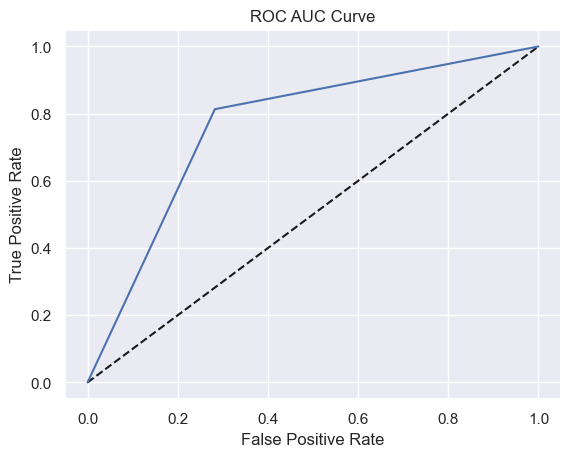

ROC AUC Score: 0.7654

XXXXXXXXXXXXXX CROSS VALIDATION XXXXXXXXXXXXXXXXXX

CV Accuracy Scores:
[0.7762073  0.80070755 0.76650943 0.76886792 0.80896226]

CV ROC AUC:
[0.7731524  0.79547211 0.760703   0.76346543 0.80619785]

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX


In [72]:
#Set the X training and test datasets
vartrain = X_train
vartest = X_test

#Set the model properties
model_raw = DecisionTreeClassifier(random_state = 21)

modeltraintest(vartrain, vartest, y_train, y_test, model_raw)

XXXXXXXXXXXXXXXX ACCURACY SCORE XXXXXXXXXXXXXXXXXX
0.773377

XXXXXXXXXXXXXXXX CONFUSION MATRIX XXXXXXXXXXXXXXXX
[[569 210]
 [202 837]]

XXXXXXXXXXXXXX CLASSIFICATION REPORT XXXXXXXXXXXXXX
              precision    recall  f1-score   support

           0       0.74      0.73      0.73       779
           1       0.80      0.81      0.80      1039

    accuracy                           0.77      1818
   macro avg       0.77      0.77      0.77      1818
weighted avg       0.77      0.77      0.77      1818


XXXXXXXXXXXXXX ROC AUC SCORE AND CHART XXXXXXXXXXXXXXXXXX



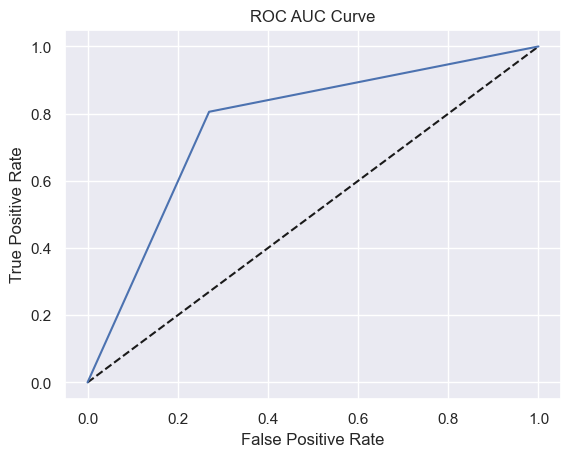

ROC AUC Score: 0.7680

XXXXXXXXXXXXXX CROSS VALIDATION XXXXXXXXXXXXXXXXXX

CV Accuracy Scores:
[0.78209658 0.80778302 0.75235849 0.79127358 0.80896226]

CV ROC AUC:
[0.77899364 0.80446422 0.74589046 0.78266035 0.80619785]

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX


In [73]:
#Set the X training and test datasets
vartrain = X_train_sc
vartest = X_test_sc

#Set the model properties
model_sc = DecisionTreeClassifier(random_state = 21)

modeltraintest(vartrain, vartest, y_train, y_test, model_sc)

XXXXXXXXXXXXXXXX ACCURACY SCORE XXXXXXXXXXXXXXXXXX
0.776128

XXXXXXXXXXXXXXXX CONFUSION MATRIX XXXXXXXXXXXXXXXX
[[563 216]
 [191 848]]

XXXXXXXXXXXXXX CLASSIFICATION REPORT XXXXXXXXXXXXXX
              precision    recall  f1-score   support

           0       0.75      0.72      0.73       779
           1       0.80      0.82      0.81      1039

    accuracy                           0.78      1818
   macro avg       0.77      0.77      0.77      1818
weighted avg       0.78      0.78      0.78      1818


XXXXXXXXXXXXXX ROC AUC SCORE AND CHART XXXXXXXXXXXXXXXXXX



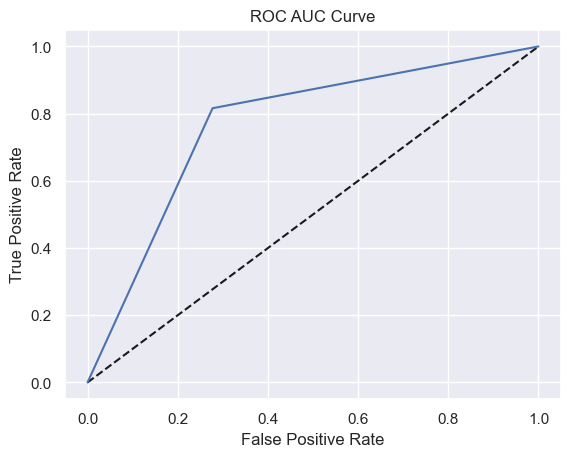

ROC AUC Score: 0.7694

XXXXXXXXXXXXXX CROSS VALIDATION XXXXXXXXXXXXXXXXXX

CV Accuracy Scores:
[0.77856302 0.79599057 0.75825472 0.78066038 0.81603774]

CV ROC AUC:
[0.7738156  0.7917093  0.75068208 0.77304868 0.81201828]

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX


In [74]:
#Set the X training and test datasets
vartrain = X_train_mm
vartest = X_test_mm

#Set the model properties
model_mm = DecisionTreeClassifier(random_state = 21)

modeltraintest(vartrain, vartest, y_train, y_test, model_mm)

XXXXXXXXXXXXXXXX ACCURACY SCORE XXXXXXXXXXXXXXXXXX
0.771727

XXXXXXXXXXXXXXXX CONFUSION MATRIX XXXXXXXXXXXXXXXX
[[559 220]
 [195 844]]

XXXXXXXXXXXXXX CLASSIFICATION REPORT XXXXXXXXXXXXXX
              precision    recall  f1-score   support

           0       0.74      0.72      0.73       779
           1       0.79      0.81      0.80      1039

    accuracy                           0.77      1818
   macro avg       0.77      0.76      0.77      1818
weighted avg       0.77      0.77      0.77      1818


XXXXXXXXXXXXXX ROC AUC SCORE AND CHART XXXXXXXXXXXXXXXXXX



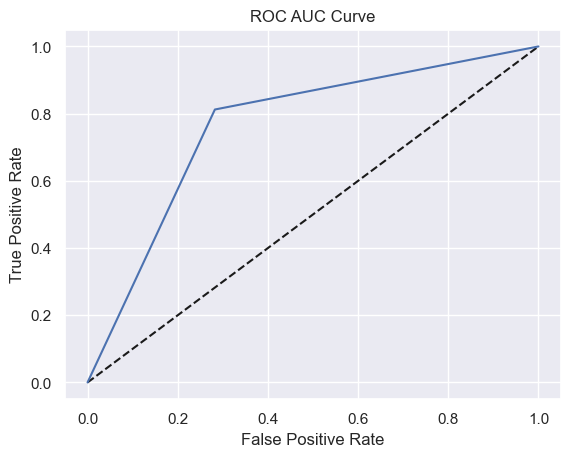

ROC AUC Score: 0.7650

XXXXXXXXXXXXXX CROSS VALIDATION XXXXXXXXXXXXXXXXXX

CV Accuracy Scores:
[0.77502945 0.80070755 0.76650943 0.76650943 0.80778302]

CV ROC AUC:
[0.77212359 0.79547211 0.760703   0.76105541 0.80516904]

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX


In [75]:
#Set the X training and test datasets
vartrain = X_train_rb
vartest = X_test_rb

#Set the model properties
model_rb = DecisionTreeClassifier(random_state = 21)

modeltraintest(vartrain, vartest, y_train, y_test, model_rb)

XXXXXXXXXXXXXXXX ACCURACY SCORE XXXXXXXXXXXXXXXXXX
0.756876

XXXXXXXXXXXXXXXX CONFUSION MATRIX XXXXXXXXXXXXXXXX
[[549 230]
 [212 827]]

XXXXXXXXXXXXXX CLASSIFICATION REPORT XXXXXXXXXXXXXX
              precision    recall  f1-score   support

           0       0.72      0.70      0.71       779
           1       0.78      0.80      0.79      1039

    accuracy                           0.76      1818
   macro avg       0.75      0.75      0.75      1818
weighted avg       0.76      0.76      0.76      1818


XXXXXXXXXXXXXX ROC AUC SCORE AND CHART XXXXXXXXXXXXXXXXXX



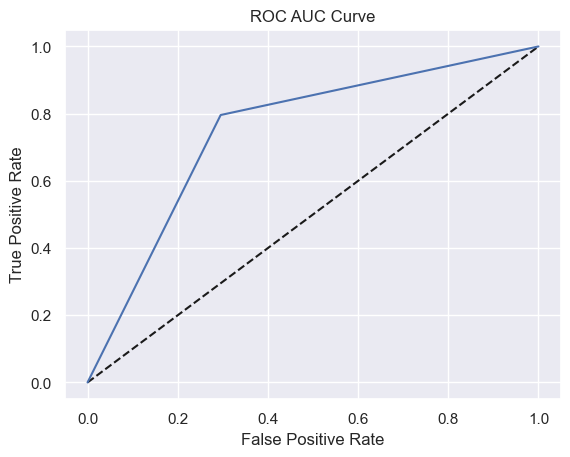

ROC AUC Score: 0.7504

XXXXXXXXXXXXXX CROSS VALIDATION XXXXXXXXXXXXXXXXXX

CV Accuracy Scores:
[0.76207303 0.77712264 0.75       0.76415094 0.77712264]

CV ROC AUC:
[0.75592627 0.77489598 0.7459473  0.76146466 0.77137189]

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX


In [76]:
#Set the X training and test datasets
vartrain = X_train_nm
vartest = X_test_nm

#Set the model properties
model_nm = DecisionTreeClassifier(random_state = 21)

modeltraintest(vartrain, vartest, y_train, y_test, model_nm)

#### Fine-tune the model to find the OPTIMAL model

iteration 1 done
iteration 2 done
iteration 3 done
iteration 4 done
iteration 5 done
iteration 6 done
iteration 7 done
iteration 8 done
iteration 9 done
iteration 10 done
iteration 11 done
iteration 12 done
iteration 13 done
iteration 14 done
iteration 15 done
iteration 16 done
iteration 17 done
iteration 18 done
iteration 19 done


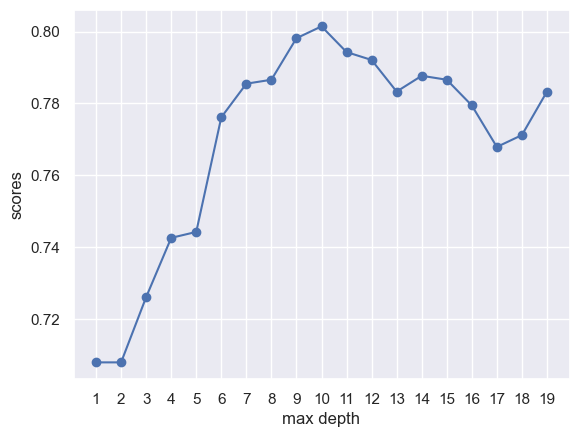

In [77]:
est = range(1,20)
scores = []
var_est = 'max depth'

vartrain = X_train_sc
vartest = X_test_sc

for d in est:
    classifier=DecisionTreeClassifier(max_depth = d, random_state = 21)
    classifier=classifier.fit(vartrain,y_train)
    scores.append(classifier.score(vartest, y_test))
    print("iteration {} done".format(d))


plt.plot(est, scores, '-o')
plt.xlabel(var_est)
plt.ylabel('scores')
plt.xticks(est)
plt.show()

In [78]:
vartrain = X_train_sc
vartest = X_test_sc
model = DecisionTreeClassifier(max_depth=10, random_state = 21)

shorttraintest(vartrain, vartest, y_train, y_test, model)

Confusion Matrix:
[[539 240]
 [121 918]]

Accuracy Score: 0.8014
Recall Score: 0.8835
Precision Score: 0.7927
ROC AUC Score: 0.8324



In [79]:
vartrain = X_train_sc
vartest = X_test_sc
model = DecisionTreeClassifier(max_depth=10, random_state = 21)


#replaced vartest with vartrain and y_test with y_train
shorttraintest(vartrain, X_train, y_train, y_train, model)

Confusion Matrix:
[[ 604 1207]
 [ 310 2120]]

Accuracy Score: 0.6423
Recall Score: 0.8724
Precision Score: 0.6372
ROC AUC Score: 0.5709



iteration 30 done
iteration 31 done
iteration 32 done
iteration 33 done
iteration 34 done
iteration 35 done
iteration 36 done
iteration 37 done
iteration 38 done
iteration 39 done
iteration 40 done
iteration 41 done
iteration 42 done
iteration 43 done
iteration 44 done
iteration 45 done
iteration 46 done
iteration 47 done
iteration 48 done
iteration 49 done


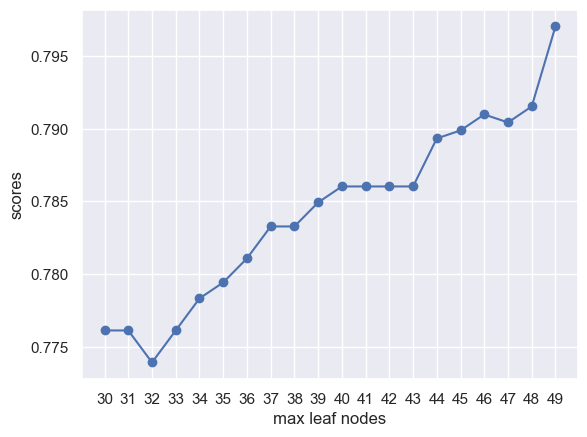

In [80]:
figsize=(20, 5)
est = range(30,50)
scores = []
var_est = 'max leaf nodes'

for d in est:
    classifier=DecisionTreeClassifier(max_depth = 10, max_leaf_nodes = d, random_state = 21)
    classifier=classifier.fit(vartrain,y_train)
    scores.append(classifier.score(vartest, y_test))
    print("iteration {} done".format(d))


plt.plot(est, scores, '-o')
plt.xlabel(var_est)
plt.ylabel('scores')
plt.xticks(est)
plt.show()

iteration 42 done
iteration 43 done
iteration 44 done
iteration 45 done
iteration 46 done
iteration 47 done
iteration 48 done
iteration 49 done
iteration 50 done
iteration 51 done
iteration 52 done
iteration 53 done
iteration 54 done


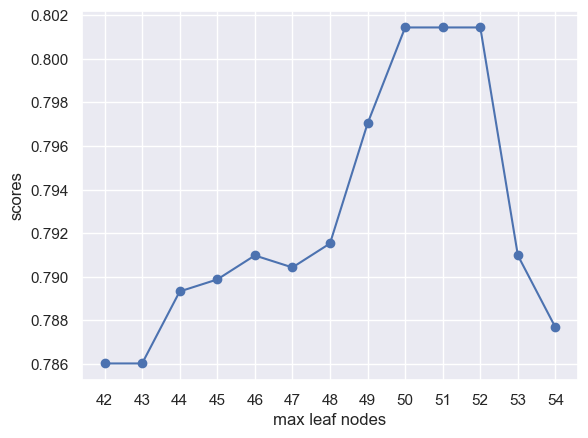

In [81]:
figsize=(20, 5)
est = range(42,55)
scores = []
var_est = 'max leaf nodes'

for d in est:
    classifier=DecisionTreeClassifier(max_depth = 10, max_leaf_nodes = d, random_state = 21)
    classifier=classifier.fit(vartrain,y_train)
    scores.append(classifier.score(vartest, y_test))
    print("iteration {} done".format(d))


plt.plot(est, scores, '-o')
plt.xlabel(var_est)
plt.ylabel('scores')
plt.xticks(est)
plt.show()

In [82]:
vartrain = X_train_sc
vartest = X_test_sc
model = DecisionTreeClassifier(max_depth =10, max_leaf_nodes = 53, class_weight=None, random_state = 21)

shorttraintest(vartrain, vartest, y_train, y_test, model)

Confusion Matrix:
[[509 270]
 [110 929]]

Accuracy Score: 0.7910
Recall Score: 0.8941
Precision Score: 0.7748
ROC AUC Score: 0.8664



In [83]:
vartrain = X_train_sc
vartest = X_test_sc
model = DecisionTreeClassifier(max_depth = 10, max_leaf_nodes = 53, class_weight='balanced', random_state = 21)

shorttraintest(vartrain, vartest, y_train, y_test, model)

Confusion Matrix:
[[601 178]
 [197 842]]

Accuracy Score: 0.7937
Recall Score: 0.8104
Precision Score: 0.8255
ROC AUC Score: 0.8549



In [84]:
cw = [None, 'balanced', {0:1, 1:1.5}, {0:1, 1:2}, {0:1, 1:3}, {0:1, 1:5}, {0:1, 1:10}, {0:1, 1:100}]

vartrain = X_train_sc
vartest = X_test_sc

for w in cw:
    print('----------------------')
    vartitle = "Model with Class Weight: " + str(w) 
    varcw = w
    model = DecisionTreeClassifier(max_depth = 10, max_leaf_nodes = 53, class_weight=varcw, random_state = 21)
    print(vartitle)
    print('')
    shorttraintest(vartrain, vartest, y_train, y_test, model)


          
print('----------------------')

----------------------
Model with Class Weight: None

Confusion Matrix:
[[509 270]
 [110 929]]

Accuracy Score: 0.7910
Recall Score: 0.8941
Precision Score: 0.7748
ROC AUC Score: 0.8664

----------------------
Model with Class Weight: balanced

Confusion Matrix:
[[601 178]
 [197 842]]

Accuracy Score: 0.7937
Recall Score: 0.8104
Precision Score: 0.8255
ROC AUC Score: 0.8549

----------------------
Model with Class Weight: {0: 1, 1: 1.5}

Confusion Matrix:
[[456 323]
 [ 70 969]]

Accuracy Score: 0.7838
Recall Score: 0.9326
Precision Score: 0.7500
ROC AUC Score: 0.8562

----------------------
Model with Class Weight: {0: 1, 1: 2}

Confusion Matrix:
[[480 299]
 [ 78 961]]

Accuracy Score: 0.7926
Recall Score: 0.9249
Precision Score: 0.7627
ROC AUC Score: 0.8684

----------------------
Model with Class Weight: {0: 1, 1: 3}

Confusion Matrix:
[[392 387]
 [ 50 989]]

Accuracy Score: 0.7596
Recall Score: 0.9519
Precision Score: 0.7188
ROC AUC Score: 0.8316

----------------------
Model with C

In [85]:

from sklearn.model_selection import RandomizedSearchCV

vartrain = X_train_sc
vartest = X_test_sc

grid={"criterion": ['gini', 'entropy'], "max_depth" : [8,10,12,13,14],
      "max_leaf_nodes" : [50,52,54,56,58],
      "class_weight": [None, 'balanced', {0:1, 1:1.5}, {0:1, 1:2}, {0:1, 1:3}]}
model_random = DecisionTreeClassifier(random_state = 21)
model_cv=RandomizedSearchCV(model_random,grid,cv=5)
model_cv.fit(vartrain,y_train)

print("tuned hyperparameters :(best parameters) ",model_cv.best_params_)
print("accuracy :",model_cv.best_score_)

tuned hyperparameters :(best parameters)  {'max_leaf_nodes': 58, 'max_depth': 12, 'criterion': 'entropy', 'class_weight': 'balanced'}
accuracy : 0.7960433473342667


In [86]:

from sklearn.model_selection import GridSearchCV


grid={"criterion": ['gini', 'entropy'], "max_depth" : [11,12,13,14,15],
      "max_leaf_nodes" : [50,52,54,56,58],
      "class_weight": [None, 'balanced', {0:1, 1:2}, {0:1, 1:3}]}
model_random = DecisionTreeClassifier(random_state = 21)
model_cv=GridSearchCV(model_random,grid,cv=5)
model_cv.fit(vartrain,y_train)


print("tuned hyperparameters :(best parameters) ",model_cv.best_params_)
print("accuracy :",model_cv.best_score_)

tuned hyperparameters :(best parameters)  {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 12, 'max_leaf_nodes': 58}
accuracy : 0.8050006111518545


### Fine-tune the model to find the DECISION model

Confusion Matrix:
[[525 254]
 [136 903]]

Accuracy Score: 0.7855
Recall Score: 0.8691
Precision Score: 0.7805


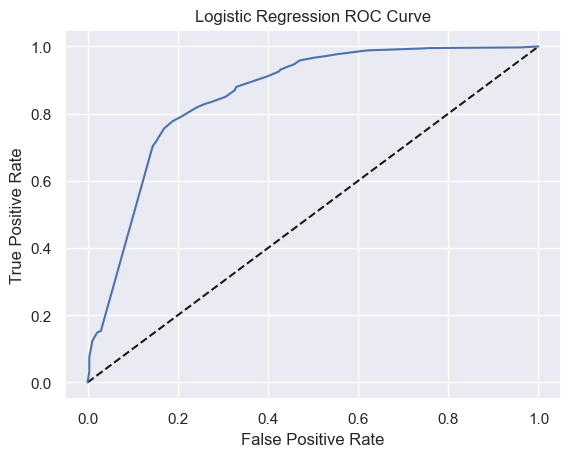

In [87]:
#Set the X training and test datasets
vartrain = X_train_sc
vartest = X_test_sc

#Set the model properties
model_dt = DecisionTreeClassifier(max_depth = 14, max_leaf_nodes = 52, 
                               class_weight=None, criterion = 'gini', random_state = 21)

#Assess with the model
model_dt.fit(vartrain, y_train)

#Predict with the model
model_pred = model_dt.predict(vartest)
model_prob = model_dt.predict_proba(vartest)


print('Confusion Matrix:')
cm_dt = confusion_matrix(y_test, model_pred)
print(cm_dt)
print("")

#Assess with the model
score = model_dt.score(vartest, y_test)
score_format = 'Accuracy Score: {0:.4f}'.format(score)
print(score_format)

recall = recall_score(y_test, model_pred)
recall_format = 'Recall Score: {0:.4f}'.format(recall)
print(recall_format)

precision = precision_score(y_test, model_pred)
precision_format = 'Precision Score: {0:.4f}'.format(precision)
print(precision_format)

y_pred_prob = model_dt.predict_proba(vartest)[:,1]

dt_fpr, dt_tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.plot([0, 1], [0, 1],'k--')
plt.plot(dt_fpr, dt_tpr, label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.show();

In [88]:
cw = [None, 'balanced', {0:1, 1:2}, {0:1, 1:3}, {0:1, 1:5}, {0:1, 1:10}, {0:1, 1:50}, {0:1, 1:100}]

vartrain = X_train
vartest = X_test

for w in cw:
    print('----------------------')
    vartitle = "Model with Class Weight: " + str(w) 
    varcw = w
    #Set the model properties
    model = DecisionTreeClassifier(max_depth = 14, max_leaf_nodes = 52, 
                               class_weight=varcw, criterion = 'gini', random_state = 21)#Assess with the model
    print(vartitle)
    print('')
    shorttraintest(vartrain, vartest, y_train, y_test, model)


          
print('----------------------')

----------------------
Model with Class Weight: None

Confusion Matrix:
[[525 254]
 [136 903]]

Accuracy Score: 0.7855
Recall Score: 0.8691
Precision Score: 0.7805
ROC AUC Score: 0.8544

----------------------
Model with Class Weight: balanced

Confusion Matrix:
[[601 178]
 [196 843]]

Accuracy Score: 0.7943
Recall Score: 0.8114
Precision Score: 0.8257
ROC AUC Score: 0.8557

----------------------
Model with Class Weight: {0: 1, 1: 2}

Confusion Matrix:
[[480 299]
 [ 78 961]]

Accuracy Score: 0.7926
Recall Score: 0.9249
Precision Score: 0.7627
ROC AUC Score: 0.8687

----------------------
Model with Class Weight: {0: 1, 1: 3}

Confusion Matrix:
[[ 380  399]
 [  27 1012]]

Accuracy Score: 0.7657
Recall Score: 0.9740
Precision Score: 0.7172
ROC AUC Score: 0.8363

----------------------
Model with Class Weight: {0: 1, 1: 5}

Confusion Matrix:
[[ 428  351]
 [  34 1005]]

Accuracy Score: 0.7882
Recall Score: 0.9673
Precision Score: 0.7412
ROC AUC Score: 0.8372

----------------------
Model 

Confusion Matrix:
[[481 298]
 [ 75 964]]

Accuracy Score: 0.7948
Recall Score: 0.9278
Precision Score: 0.7639


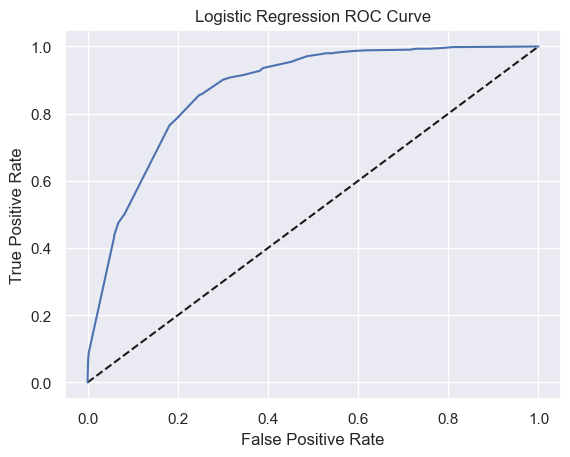

In [89]:
#Set the X training and test datasets
vartrain = X_train_sc
vartest = X_test_sc

#Set the model properties
model_dt_2 = DecisionTreeClassifier(max_depth = 14, max_leaf_nodes = 52, 
                               class_weight={0: 1, 1: 2}, criterion = 'gini', random_state = 21)

#Assess with the model
model_dt_2.fit(vartrain, y_train)

#Predict with the model
model_pred = model_dt_2.predict(vartest)
model_prob = model_dt_2.predict_proba(vartest)


print('Confusion Matrix:')
cm_dt_2 = confusion_matrix(y_test, model_pred)
print(cm_dt_2)
print("")

#Assess with the model
score = model_dt_2.score(vartest, y_test)
score_format = 'Accuracy Score: {0:.4f}'.format(score)
print(score_format)

recall = recall_score(y_test, model_pred)
recall_format = 'Recall Score: {0:.4f}'.format(recall)
print(recall_format)

precision = precision_score(y_test, model_pred)
precision_format = 'Precision Score: {0:.4f}'.format(precision)
print(precision_format)

y_pred_prob = model_dt_2.predict_proba(vartest)[:,1]

dt_2_fpr, dt_2_tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.plot([0, 1], [0, 1],'k--')
plt.plot(dt_2_fpr, dt_2_tpr, label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.show();

In [90]:
from sklearn import tree
X_names = X_train.columns.values.tolist()
plt.rcParams['text.color'] = 'black'
plt.figure(figsize=(50, 35), dpi=300)

plot_tree(model, 
          filled=True, 
          rounded=True,
          fontsize=15,
          proportion=True,
          class_names=["Super Host", "Not Super"], 
          feature_names=X_names);

[Text(0, 0.5, 'Super Host'), Text(0, 1.5, 'Not Super')]

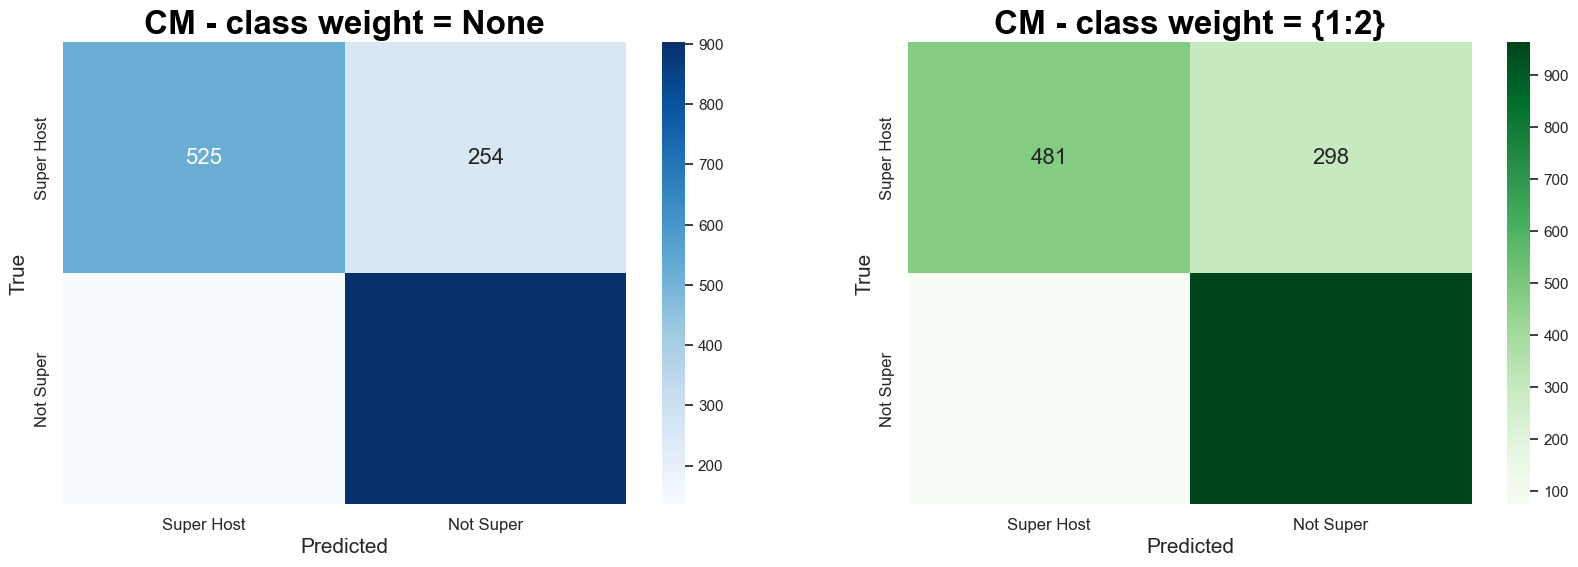

In [91]:
plt.figure(figsize=(20,6))


plt.subplot(121)


plt.title('CM - class weight = None', fontweight='bold', color = 'black', fontsize='24', horizontalalignment='center')
chart = sns.heatmap(cm_dt, annot=True, cmap="Blues", annot_kws={"size": 16}, fmt="g")
chart.set_xlabel('Predicted', fontsize=15)
chart.set_ylabel('True', fontsize=15)
chart.xaxis.set_ticklabels(['Super Host', 'Not Super'], fontsize=12)
chart.yaxis.set_ticklabels(['Super Host', 'Not Super'], fontsize=12, va='center')


plt.subplot(122)
plt.title('CM - class weight = {1:2}', fontweight='bold', color = 'black', fontsize='24', horizontalalignment='center')
chart = sns.heatmap(cm_dt_2, annot=True, cmap="Greens", annot_kws={"size": 16}, fmt="g")
chart.set_xlabel('Predicted', fontsize=15)
chart.set_ylabel('True', fontsize=15)
chart.xaxis.set_ticklabels(['Super Host', 'Not Super'], fontsize=12)
chart.yaxis.set_ticklabels(['Super Host', 'Not Super'], fontsize=12, va='center')

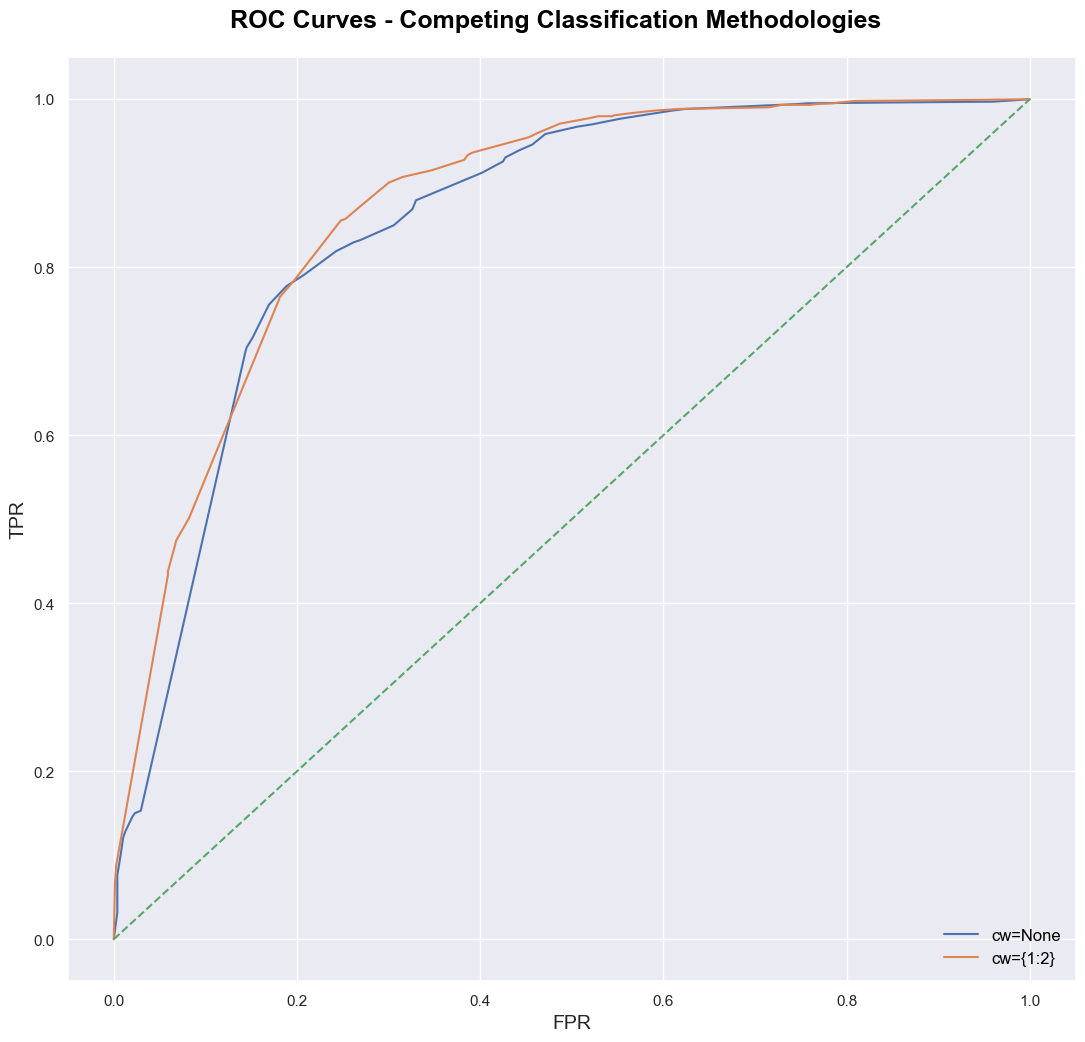

In [92]:
# Create Overall ROC Curve 
plt.figure(figsize = (13,12))
plt.suptitle('ROC Curves - Competing Classification Methodologies', fontweight='bold', fontsize=18, y=.92)
plt.plot(dt_fpr, dt_tpr, label='cw=None')
plt.plot(dt_2_fpr, dt_2_tpr, label='cw={1:2}')
plt.plot([0,1], [0,1], linestyle='--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('FPR', fontsize=14)
plt.ylabel('TPR', fontsize=14)
plt.legend(loc="lower right", frameon=False, fontsize=12)
plt.show()

In [93]:
X_names = pd.DataFrame(list(X.columns))
df_fi = pd.DataFrame(model_dt.feature_importances_)
df_fi_2 = pd.DataFrame(model_dt_2.feature_importances_)
df_feat_imp = pd.concat([X_names, df_fi, df_fi_2], axis = 1)
df_feat_imp.columns = ['Features', 'dt_importance', 'dt_2_importance']
df_feat_imp

Features  dt_importance  \
0                      host_total_listings_count       0.139375   
1                           host_has_profile_pic       0.000000   
2                         host_identity_verified       0.000000   
3                         neighbourhood_cleansed       0.011408   
4                                   accommodates       0.000000   
5                                       bedrooms       0.000000   
6                                           beds       0.033792   
7                                          price       0.025097   
8                         minimum_nights_avg_ntm       0.040164   
9                         maximum_nights_avg_ntm       0.008875   
10                               availability_60       0.000000   
11                               availability_90       0.005620   
12                              availability_365       0.000000   
13                             number_of_reviews       0.042953   
14                         number_of_reviews_ltm       0.013753   
15                        number_of_reviews_l30d       0.000000   
16                           review_scores_value       0.300438   
17                              instant_bookable       0.000000   
18                calculated_host_listings_count       0.085866   
19   calculated_host_listings_count_entire_homes       0.049046   
20  calculated_host_listings_count_private_rooms       0.027898   
21   calculated_host_listings_count_shared_rooms       0.005659   
22                             reviews_per_month       0.129656   
23                               Entire home/apt       0.000000   
24                                    Hotel room       0.014601   
25                                  Private room       0.000000   
26                                   Shared room       0.000000   
27                               amenities_count       0.065800   

    dt_2_importance  
0          0.188082  
1          0.000000  
2          0.009075  
3          0.011383  
4          0.000000  
5          0.000000  
6          0.000000  
7          0.033821  
8          0.017563  
9          0.032141  
10         0.012105  
11         0.000000  
12         0.000000  
13         0.043574  
14         0.015973  
15         0.000000  
16         0.239107  
17         0.016184  
18         0.154664  
19         0.048573  
20         0.027544  
21         0.000000  
22         0.080927  
23         0.000000  
24         0.000000  
25         0.000000  
26         0.000000  
27         0.069285

In [94]:
df_feat_imp[(df_feat_imp['dt_2_importance']!=0) | (df_feat_imp['dt_importance']!=0)].sort_values('dt_2_importance', ascending = False)

Features  dt_importance  \
16                           review_scores_value       0.300438   
0                      host_total_listings_count       0.139375   
18                calculated_host_listings_count       0.085866   
22                             reviews_per_month       0.129656   
27                               amenities_count       0.065800   
19   calculated_host_listings_count_entire_homes       0.049046   
13                             number_of_reviews       0.042953   
7                                          price       0.025097   
9                         maximum_nights_avg_ntm       0.008875   
20  calculated_host_listings_count_private_rooms       0.027898   
8                         minimum_nights_avg_ntm       0.040164   
17                              instant_bookable       0.000000   
14                         number_of_reviews_ltm       0.013753   
10                               availability_60       0.000000   
3                         neighbourhood_cleansed       0.011408   
2                         host_identity_verified       0.000000   
11                               availability_90       0.005620   
6                                           beds       0.033792   
21   calculated_host_listings_count_shared_rooms       0.005659   
24                                    Hotel room       0.014601   

    dt_2_importance  
16         0.239107  
0          0.188082  
18         0.154664  
22         0.080927  
27         0.069285  
19         0.048573  
13         0.043574  
7          0.033821  
9          0.032141  
20         0.027544  
8          0.017563  
17         0.016184  
14         0.015973  
10         0.012105  
3          0.011383  
2          0.009075  
11         0.000000  
6          0.000000  
21         0.000000  
24         0.000000